In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
X = load_iris().data
y = load_iris().target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [4]:
clf = DecisionTreeClassifier(random_state=1)

In [5]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


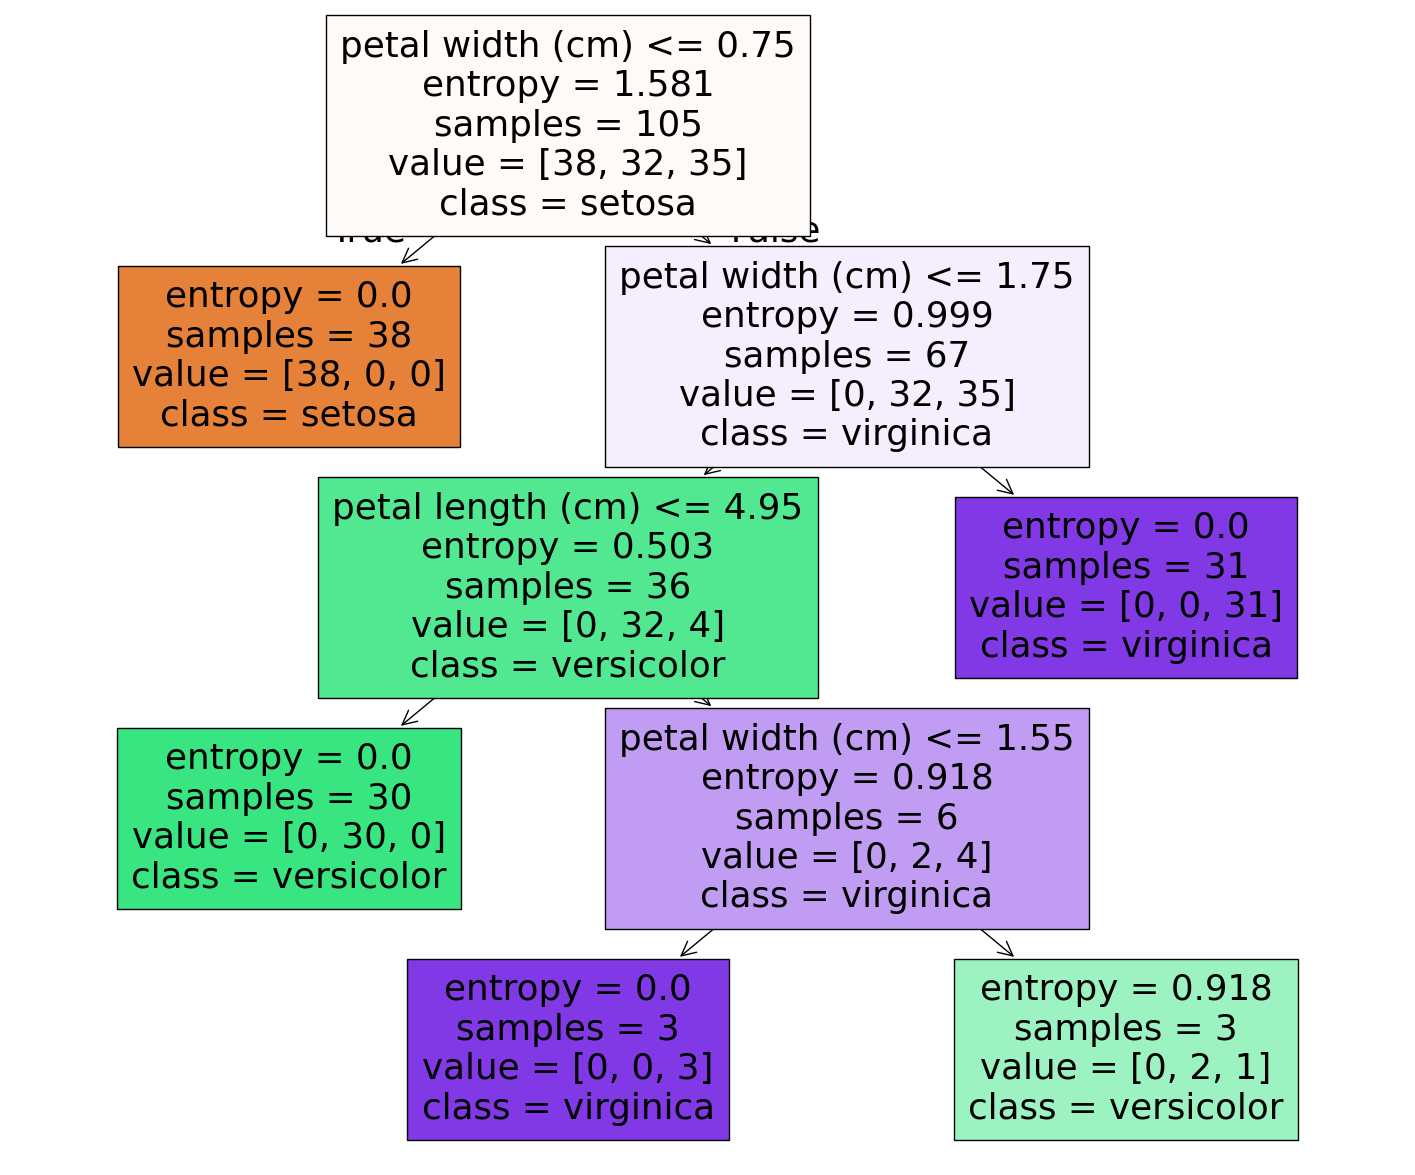

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=load_iris().feature_names,
          class_names=load_iris().target_names)
plt.show()

Decision Tree Classifier With Spam Email Detection Dataset

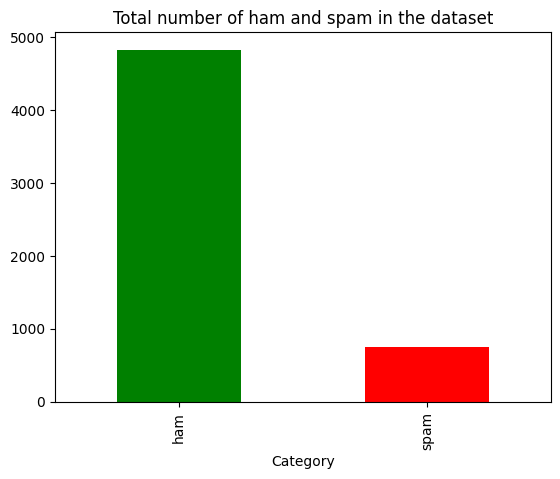

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_link = 'https://media.geeksforgeeks.org/wp-content/uploads/20240620175612/spam_email.csv'
df = pd.read_csv(dataset_link)

df['Category'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [11]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def clean_str(string):
    reg = RegexpTokenizer(r'[a-z]+')
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

df['Category'] = df['Category'].map({'ham' : 0,'spam' : 1 })

df['text_clean'] = df['Message'].apply(
  lambda string: clean_str(string))


cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)

y = df.Category

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.92      0.88      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

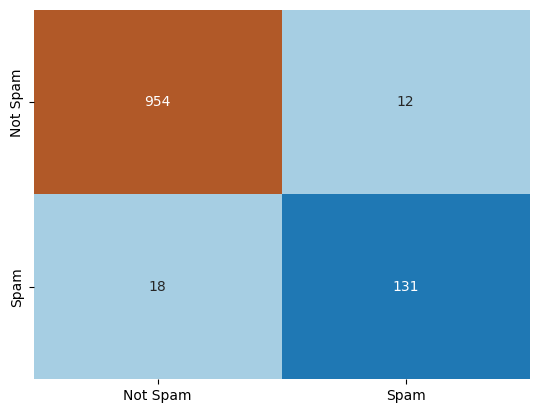

In [14]:
import seaborn as sns

cmat = confusion_matrix(y_test, pred)

sns.heatmap(cmat, annot=True, cmap='Paired',
            cbar=False, fmt="d", xticklabels=[
            'Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])